# Week 10: Colab Experiment

# I. Introduction
In this exercise, we apply CNN to MNIST data to classify the hand written digits.

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# Data Loading
Load the data from the MNIST dataset

In [2]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 349kB/s]


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]


Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.04MB/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



# Visualize dataset sample
Show some sample.

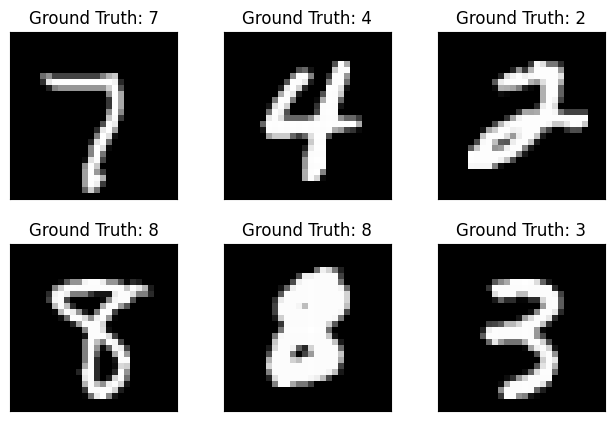

In [3]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

# II. Methods


In [4]:
from os import X_OK

# This class implements a minimal network (which still does okay)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Valid convolution, 1 channel in, 2 channels out, stride 1, kernel size = 3
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3)
        # Dropout for convolutions
        self.drop = nn.Dropout2d()
        # Fully connected layer
        self.fc1 = nn.Linear(338, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.drop(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.log_softmax(x)
        return x



In [5]:
class Net11(nn.Module):
    def __init__(self):
        super(Net11, self).__init__()

        # 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)

        # 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)

        # 5. A 2D Dropout layer
        self.dropout2d = nn.Dropout2d(p=0.5)

        # 9. A fully connected layer mapping from (flattened size) to 50
        self.fc1 = nn.Linear(20 * 4 * 4, 50)  # Adjust dimensions based on output shape

        # 11. A fully connected layer mapping from 50 to 10 dimensions
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Step-by-step through each of the layers

        # 1. Convolution layer 1
        x = self.conv1(x)
        # 2. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 3. ReLU activation after first convolution
        x = F.relu(x)


        # 4. Convolution layer 2
        x = self.conv2(x)
                # 5. Dropout layer
        x = self.dropout2d(x)

          # 6. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)


        # 7. ReLU activation after second convolution
        x = F.relu(x)

        # 8. Flattening operation
        x = x.view(x.size(0), -1)

        # 9. Fully connected layer to map flattened input to 50
        x = self.fc1(x)

        # 10. ReLU after first fully connected layer
        x = F.relu(x)

        # 11. Fully connected layer to map 50 to 10
        x = self.fc2(x)

        # 12. Softmax function
        x = F.log_softmax(x, dim=1)

        return x

In [6]:


class Net12(nn.Module):
    def __init__(self):
        super(Net12, self).__init__()

        # 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)

        # Batch normalization for the first convolution layer
        self.bn1 = nn.BatchNorm2d(10)

        # 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)

        # Batch normalization for the second convolution layer
        self.bn2 = nn.BatchNorm2d(20)

        # 5. A 2D Dropout layer
        self.dropout2d = nn.Dropout2d(p=0.5)

        # 9. A fully connected layer mapping from (flattened size) to 50
        self.fc1 = nn.Linear(20 * 4 * 4, 50)  # Adjust dimensions based on output shape

        # Batch normalization for the first fully connected layer
        self.bn3 = nn.BatchNorm1d(50)

        # 11. A fully connected layer mapping from 50 to 10 dimensions
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Step-by-step through each of the layers

        # 1. Convolution layer 1
        x = self.conv1(x)

        #  Batch normalization after first convolution
        x = self.bn1(x)

        # 2. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 3. ReLU activation after first convolution
        x = F.relu(x)

        # 4. Convolution layer 2
        x = self.conv2(x)

        #  Batch normalization after second convolution
        x = self.bn2(x)

        # 5. Dropout layer
        x = self.dropout2d(x)

        # 6. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 7. ReLU activation after second convolution
        x = F.relu(x)

        # 8. Flattening operation
        x = x.view(x.size(0), -1)

        # 9. Fully connected layer to map flattened input to 50
        x = self.fc1(x)

        # Batch normalization after first fully connected layer
        x = self.bn3(x)

        # 10. ReLU after first fully connected layer
        x = F.relu(x)

        # 11. Fully connected layer to map 50 to 10
        x = self.fc2(x)

        # 12. Softmax function
        x = F.log_softmax(x, dim=1)

        return x

In [7]:
class Net13(nn.Module):
    def __init__(self):
        super(Net13, self).__init__()

        # 1. A valid convolution with kernel size 5, 1 input channel and 16 output channels
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)

        # Batch normalization for the first convolution layer
        self.bn1 = nn.BatchNorm2d(16)

        # 4. A valid convolution with kernel size 5, 16 input channels and 32 output channels
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)

        # Batch normalization for the second convolution layer
        self.bn2 = nn.BatchNorm2d(32)

        # 5. A 2D Dropout layer
        self.dropout2d = nn.Dropout2d(p=0.5)

        # 9. A fully connected layer mapping from (flattened size) to 50
        self.fc1 = nn.Linear(32 * 4 * 4, 50)  # Adjust dimensions based on output shape

        # Batch normalization for the first fully connected layer
        self.bn3 = nn.BatchNorm1d(50)

        # 11. A fully connected layer mapping from 50 to 10 dimensions
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Step-by-step through each of the layers

        # 1. Convolution layer 1
        x = self.conv1(x)

        # Batch normalization after first convolution
        x = self.bn1(x)

        # 2. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 3. ReLU activation after first convolution
        x = F.relu(x)

        # 4. Convolution layer 2
        x = self.conv2(x)

        # Batch normalization after second convolution
        x = self.bn2(x)

        # 5. Dropout layer
        x = self.dropout2d(x)

        # 6. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 7. ReLU activation after second convolution
        x = F.relu(x)

        # 8. Flattening operation
        x = x.view(x.size(0), -1)

        # 9. Fully connected layer to map flattened input to 50
        x = self.fc1(x)

        # Batch normalization after first fully connected layer
        x = self.bn3(x)

        # 10. ReLU after first fully connected layer
        x = F.relu(x)

        # 11. Fully connected layer to map 50 to 10
        x = self.fc2(x)

        # 12. Softmax function
        x = F.log_softmax(x, dim=1)

        return x


In [20]:
class Net14(nn.Module):
    def __init__(self):
        super(Net14, self).__init__()

        # 1. A valid convolution with kernel size 5, 1 input channel and 16 output channels
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)


        # 4. A valid convolution with kernel size 5, 16 input channels and 32 output channels
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)

        # 5. A 2D Dropout layer
        self.dropout2d = nn.Dropout2d(p=0.5)

        # 9. A fully connected layer mapping from (flattened size) to 50
        self.fc1 = nn.Linear(32 * 4 * 4, 50)  # Adjust dimensions based on output shape


        # 11. A fully connected layer mapping from 50 to 10 dimensions
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Step-by-step through each of the layers

        # 1. Convolution layer 1
        x = self.conv1(x)



        # 2. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 3. ReLU activation after first convolution
        x = F.relu(x)

        # 4. Convolution layer 2
        x = self.conv2(x)


        # 5. Dropout layer
        x = self.dropout2d(x)

        # 6. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 7. ReLU activation after second convolution
        x = F.relu(x)

        # 8. Flattening operation
        x = x.view(x.size(0), -1)

        # 9. Fully connected layer to map flattened input to 50
        x = self.fc1(x)


        # 10. ReLU after first fully connected layer
        x = F.relu(x)

        # 11. Fully connected layer to map 50 to 10
        x = self.fc2(x)

        # 12. Softmax function
        x = F.log_softmax(x, dim=1)

        return x


In [22]:
# TODO: Change above Net to Net2 class to implement

# 1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
# 2. A max pooling operation over a 2x2 area
# 3. A Relu
# 4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
# 5. A 2D Dropout layer
# 6. A max pooling operation over a 2x2 area
# 7. A relu
# 8. A flattening operation
# 9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
# 10. A ReLU
# 11. A fully connected layer mapping from 50 to 10 dimensions
# 12. A softmax function.

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()

        # 1. A valid convolution with kernel size 5, 1 input channel and 16 output channels
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)

        # Batch normalization for the first convolution layer
        self.bn1 = nn.BatchNorm2d(16)

        # 4. A valid convolution with kernel size 5, 16 input channels and 32 output channels
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)

        # Batch normalization for the second convolution layer
        self.bn2 = nn.BatchNorm2d(32)

        # 5. A 2D Dropout layer
        self.dropout2d = nn.Dropout2d(p=0.5)

        # 9. A fully connected layer mapping from (flattened size) to 50
        self.fc1 = nn.Linear(32 * 4 * 4, 50)  # Adjust dimensions based on output shape

        # Batch normalization for the first fully connected layer
        self.bn3 = nn.BatchNorm1d(50)

        # 11. A fully connected layer mapping from 50 to 10 dimensions
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Step-by-step through each of the layers

        # 1. Convolution layer 1
        x = self.conv1(x)

        # Batch normalization after first convolution
        x = self.bn1(x)

        # 2. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 3. ReLU activation after first convolution
        x = F.relu(x)

        # 4. Convolution layer 2
        x = self.conv2(x)

        # Batch normalization after second convolution
        x = self.bn2(x)

        # 5. Dropout layer
        x = self.dropout2d(x)

        # 6. Max pooling operation over a 2x2 area
        x = F.max_pool2d(x, 2)

        # 7. ReLU activation after second convolution
        x = F.relu(x)

        # 8. Flattening operation
        x = x.view(x.size(0), -1)

        # 9. Fully connected layer to map flattened input to 50
        x = self.fc1(x)

        # Batch normalization after first fully connected layer
        x = self.bn3(x)

        # 10. ReLU after first fully connected layer
        x = F.relu(x)

        # 11. Fully connected layer to map 50 to 10
        x = self.fc2(x)

        # 12. Softmax function
        x = F.log_softmax(x, dim=1)

        return x


In [9]:
# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [10]:
# Main training routine
# TODO: Read it and understand what it does, you would need to implement it in the next colab HW

def train(epoch, model):
  # Set the model to training mode (activates features like dropout and batch normalization)
  model.train()

  # Iterate through the training dataset in batches
  for batch_idx, (data, target) in enumerate(train_loader):
    # Zero the gradients of the model parameters (important for backpropagation)
    optimizer.zero_grad()

    # Perform forward pass to get model predictions
    output = model(data)

    # Calculate the Negative Log-Likelihood loss between predictions and true labels
    loss = F.nll_loss(output, target)

    # Perform backpropagation to compute gradients
    loss.backward()

    # Update the model parameters based on the computed gradients
    optimizer.step()

    # Every 10 batches, print the progress and loss
    if batch_idx % 10 == 0:
      # Get the predicted class (the one with the highest probability)
      pred = output.data.max(1, keepdim=True)[1]

      # Calculate the number of correct predictions for this batch
      correct = pred.eq(target.data.view_as(pred)).sum()

      # Print out the current training status (epoch, batch, and loss)
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))


In [11]:
# Run on test data
# TODO: Read it and understand what it does, you would need to implement it in the next colab HW

def test(model):
  # Set the model to evaluation mode (disables dropout, batch norm, etc.)
  model.eval()

  test_loss = 0  # Variable to accumulate the total test loss
  correct = 0  # Variable to count the number of correct predictions

  # Disable gradient computation to save memory and computations (for evaluation)
  with torch.no_grad():
    # Loop through the test data in batches
    for data, target in test_loader:
      # Get the model's predictions for the current batch
      output = model(data)

      # Compute the negative log likelihood loss for the current batch
      # `size_average=False` means it sums the loss across all elements in the batch
      test_loss += F.nll_loss(output, target, size_average=False).item()

      # Get the predicted class by selecting the class with the highest probability
      # `output.data.max(1, keepdim=True)[1]` gives the index of the max value along axis 1 (for each sample in the batch)
      pred = output.data.max(1, keepdim=True)[1]

      # Compare predictions with the true labels (target) and count correct predictions
      correct += pred.eq(target.data.view_as(pred)).sum()

  # Average test loss across all test samples
  test_loss /= len(test_loader.dataset)

  # Print out the test results: average loss and accuracy
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

  # Return the accuracy as a percentage
  return 100. * correct / len(test_loader.dataset)

In [12]:
# Train and test Model 1

# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model)
accuracy1 = test(model)


<ipython-input-4-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)
/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.4494, Accuracy: 1032/10000 (10%)

Train Epoch: 1 [0/60000]	Loss: 2.689353
Train Epoch: 1 [640/60000]	Loss: 2.301216
Train Epoch: 1 [1280/60000]	Loss: 2.269311
Train Epoch: 1 [1920/60000]	Loss: 2.343655
Train Epoch: 1 [2560/60000]	Loss: 2.343455
Train Epoch: 1 [3200/60000]	Loss: 2.244466
Train Epoch: 1 [3840/60000]	Loss: 2.184391
Train Epoch: 1 [4480/60000]	Loss: 2.078763
Train Epoch: 1 [5120/60000]	Loss: 2.017750
Train Epoch: 1 [5760/60000]	Loss: 1.623391
Train Epoch: 1 [6400/60000]	Loss: 1.624617
Train Epoch: 1 [7040/60000]	Loss: 1.558675
Train Epoch: 1 [7680/60000]	Loss: 1.643901
Train Epoch: 1 [8320/60000]	Loss: 1.524902
Train Epoch: 1 [8960/60000]	Loss: 1.624967
Train Epoch: 1 [9600/60000]	Loss: 1.270872
Train Epoch: 1 [10240/60000]	Loss: 1.561282
Train Epoch: 1 [10880/60000]	Loss: 1.647509
Train Epoch: 1 [11520/60000]	Loss: 1.283954
Train Epoch: 1 [12160/60000]	Loss: 1.333261
Train Epoch: 1 [12800/60000]	Loss: 1.660984
Train Epoch: 1 [13440/60000]	Loss: 1.2

In [13]:
# the first attempt
# Create network
model11 = Net11()
# Initialize model weights
model11.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model11.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model11)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model11)
accuracy11 = test(model11)


Test set: Avg. loss: 2.3401, Accuracy: 941/10000 (9%)

Train Epoch: 1 [0/60000]	Loss: 2.531773
Train Epoch: 1 [640/60000]	Loss: 2.149321
Train Epoch: 1 [1280/60000]	Loss: 1.946903
Train Epoch: 1 [1920/60000]	Loss: 2.046588
Train Epoch: 1 [2560/60000]	Loss: 1.690465
Train Epoch: 1 [3200/60000]	Loss: 1.587277
Train Epoch: 1 [3840/60000]	Loss: 1.362225
Train Epoch: 1 [4480/60000]	Loss: 1.136430
Train Epoch: 1 [5120/60000]	Loss: 1.099880
Train Epoch: 1 [5760/60000]	Loss: 1.082085
Train Epoch: 1 [6400/60000]	Loss: 0.808004
Train Epoch: 1 [7040/60000]	Loss: 0.879838
Train Epoch: 1 [7680/60000]	Loss: 0.810423
Train Epoch: 1 [8320/60000]	Loss: 0.742496
Train Epoch: 1 [8960/60000]	Loss: 0.514455
Train Epoch: 1 [9600/60000]	Loss: 0.627475
Train Epoch: 1 [10240/60000]	Loss: 0.863848
Train Epoch: 1 [10880/60000]	Loss: 0.827243
Train Epoch: 1 [11520/60000]	Loss: 0.701032
Train Epoch: 1 [12160/60000]	Loss: 0.605181
Train Epoch: 1 [12800/60000]	Loss: 0.329108
Train Epoch: 1 [13440/60000]	Loss: 0.703

In [14]:
# the second attempt

# Create network
model12 = Net12()
# Initialize model weights
model12.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model12.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model12)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model12)
accuracy12 = test(model12)


Test set: Avg. loss: 2.4207, Accuracy: 1137/10000 (11%)

Train Epoch: 1 [0/60000]	Loss: 2.649522
Train Epoch: 1 [640/60000]	Loss: 2.278904
Train Epoch: 1 [1280/60000]	Loss: 1.980658
Train Epoch: 1 [1920/60000]	Loss: 1.898101
Train Epoch: 1 [2560/60000]	Loss: 1.653743
Train Epoch: 1 [3200/60000]	Loss: 1.646604
Train Epoch: 1 [3840/60000]	Loss: 1.440535
Train Epoch: 1 [4480/60000]	Loss: 1.416125
Train Epoch: 1 [5120/60000]	Loss: 1.237607
Train Epoch: 1 [5760/60000]	Loss: 1.208926
Train Epoch: 1 [6400/60000]	Loss: 1.217246
Train Epoch: 1 [7040/60000]	Loss: 1.015575
Train Epoch: 1 [7680/60000]	Loss: 1.022865
Train Epoch: 1 [8320/60000]	Loss: 1.120336
Train Epoch: 1 [8960/60000]	Loss: 0.930778
Train Epoch: 1 [9600/60000]	Loss: 0.880443
Train Epoch: 1 [10240/60000]	Loss: 0.869793
Train Epoch: 1 [10880/60000]	Loss: 0.957280
Train Epoch: 1 [11520/60000]	Loss: 0.811245
Train Epoch: 1 [12160/60000]	Loss: 1.016577
Train Epoch: 1 [12800/60000]	Loss: 0.903578
Train Epoch: 1 [13440/60000]	Loss: 0.7

In [15]:
#the third attempt
# Create network
model13 = Net13()  # Assuming Net12 is the class for the model
# Initialize model weights
model13.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model13.parameters(), lr=0.01, momentum=0.5)  # Use model13 here

# Get initial performance
test(model13)  # Use model13 for testing

# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
    train(epoch, model13)  # Use model13 for training

accuracy13 = test(model13)  # Use model13 for testing and saving the result


Test set: Avg. loss: 2.4481, Accuracy: 723/10000 (7%)

Train Epoch: 1 [0/60000]	Loss: 2.875590
Train Epoch: 1 [640/60000]	Loss: 2.146916
Train Epoch: 1 [1280/60000]	Loss: 1.791744
Train Epoch: 1 [1920/60000]	Loss: 1.492237
Train Epoch: 1 [2560/60000]	Loss: 1.310218
Train Epoch: 1 [3200/60000]	Loss: 1.244828
Train Epoch: 1 [3840/60000]	Loss: 1.381123
Train Epoch: 1 [4480/60000]	Loss: 1.091934
Train Epoch: 1 [5120/60000]	Loss: 0.932511
Train Epoch: 1 [5760/60000]	Loss: 1.007804
Train Epoch: 1 [6400/60000]	Loss: 0.999346
Train Epoch: 1 [7040/60000]	Loss: 0.877601
Train Epoch: 1 [7680/60000]	Loss: 0.882578
Train Epoch: 1 [8320/60000]	Loss: 0.818984
Train Epoch: 1 [8960/60000]	Loss: 0.706777
Train Epoch: 1 [9600/60000]	Loss: 0.932494
Train Epoch: 1 [10240/60000]	Loss: 0.734835
Train Epoch: 1 [10880/60000]	Loss: 0.648493
Train Epoch: 1 [11520/60000]	Loss: 0.666741
Train Epoch: 1 [12160/60000]	Loss: 0.695368
Train Epoch: 1 [12800/60000]	Loss: 0.897760
Train Epoch: 1 [13440/60000]	Loss: 0.567

In [21]:
#the forth  attempt
# Create network
model14 = Net14()  # Assuming Net12 is the class for the model
# Initialize model weights
model14.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model14.parameters(), lr=0.01, momentum=0.5)  # Use model13 here

# Get initial performance
test(model14)  # Use model13 for testing

# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
    train(epoch, model14)  # Use model13 for training

accuracy13 = test(model14)  # Use model13 for testing and saving the result

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3444, Accuracy: 1074/10000 (11%)

Train Epoch: 1 [0/60000]	Loss: 2.388059
Train Epoch: 1 [640/60000]	Loss: 2.157557
Train Epoch: 1 [1280/60000]	Loss: 1.977251
Train Epoch: 1 [1920/60000]	Loss: 1.673462
Train Epoch: 1 [2560/60000]	Loss: 1.565426
Train Epoch: 1 [3200/60000]	Loss: 1.279938
Train Epoch: 1 [3840/60000]	Loss: 0.915249
Train Epoch: 1 [4480/60000]	Loss: 0.800116
Train Epoch: 1 [5120/60000]	Loss: 0.687149
Train Epoch: 1 [5760/60000]	Loss: 0.530700
Train Epoch: 1 [6400/60000]	Loss: 0.636508
Train Epoch: 1 [7040/60000]	Loss: 0.576272
Train Epoch: 1 [7680/60000]	Loss: 0.451708
Train Epoch: 1 [8320/60000]	Loss: 0.351968
Train Epoch: 1 [8960/60000]	Loss: 0.351425
Train Epoch: 1 [9600/60000]	Loss: 0.560671
Train Epoch: 1 [10240/60000]	Loss: 0.467089
Train Epoch: 1 [10880/60000]	Loss: 0.468397
Train Epoch: 1 [11520/60000]	Loss: 0.525140
Train Epoch: 1 [12160/60000]	Loss: 0.388328
Train Epoch: 1 [12800/60000]	Loss: 0.309029
Train Epoch: 1 [13440/60000]	Loss: 0.5

In [23]:
# Train and test Model 2

# Create network
model2 = Net2()
# Initialize model weights
model2.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model2.parameters(), lr=0.01, momentum=0.5)

# Get initial performance
test(model2)
# Train for ten epochs
n_epochs = 10
for epoch in range(1, n_epochs + 1):
  train(epoch, model2)
accuracy2 = test(model2)

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.6516, Accuracy: 585/10000 (6%)

Train Epoch: 1 [0/60000]	Loss: 2.806960
Train Epoch: 1 [640/60000]	Loss: 1.908103
Train Epoch: 1 [1280/60000]	Loss: 1.860841
Train Epoch: 1 [1920/60000]	Loss: 1.406683
Train Epoch: 1 [2560/60000]	Loss: 1.438977
Train Epoch: 1 [3200/60000]	Loss: 1.282629
Train Epoch: 1 [3840/60000]	Loss: 1.267079
Train Epoch: 1 [4480/60000]	Loss: 1.251816
Train Epoch: 1 [5120/60000]	Loss: 1.118747
Train Epoch: 1 [5760/60000]	Loss: 1.064262
Train Epoch: 1 [6400/60000]	Loss: 0.962207
Train Epoch: 1 [7040/60000]	Loss: 0.971032
Train Epoch: 1 [7680/60000]	Loss: 0.793020
Train Epoch: 1 [8320/60000]	Loss: 0.777099
Train Epoch: 1 [8960/60000]	Loss: 0.800797
Train Epoch: 1 [9600/60000]	Loss: 0.795433
Train Epoch: 1 [10240/60000]	Loss: 0.683673
Train Epoch: 1 [10880/60000]	Loss: 0.796938
Train Epoch: 1 [11520/60000]	Loss: 0.698323
Train Epoch: 1 [12160/60000]	Loss: 0.615170
Train Epoch: 1 [12800/60000]	Loss: 0.792083
Train Epoch: 1 [13440/60000]	Loss: 0.537

## III. Results

Here we train the CNN model and apply it to the test set. There are 10 epochs in training. There is no validation set here, we simply take the model at the end of the training procedure.

In [24]:
print(f"Model 1 Accuracy: {round(float(accuracy1.numpy()),2)}%")
print(f"Model 2 Accuracy: {round(float(accuracy2.numpy()),2)}%")

Model 1 Accuracy: 91.61%
Model 2 Accuracy: 98.94%


<ipython-input-4-b8ebf8cbff0b>:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


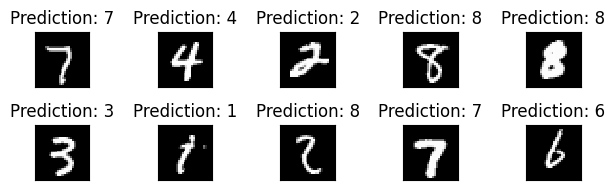

In [25]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

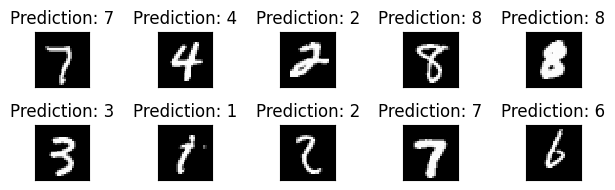

In [26]:
# Run network on data we got before and show predictions
output = model2(example_data)

fig = plt.figure()
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

## IV. Conclusion and Discussion

### First Attempt:
In the initial attempt, I implemented a model based on the provided specifications, which included the following key components:

- **First Convolutional Layer**: A valid convolution with a kernel size of 5, 1 input channel, and 10 output channels.
- **Second Convolutional Layer**: A second valid convolution with a kernel size of 5, 10 input channels, and 20 output channels.

**First Attempt Results**:
- Test set: Avg. loss: 0.0393, Accuracy: 9864/10000 (99%)
---

### Second Attempt:
For the second attempt, I made several architectural enhancements to improve performance and address convergence issues observed in the first attempt. The main changes included:

- Adding **Batch Normalization** after each convolutional layer and the first fully connected layer to stabilize training.

**Second Attempt Results**:
- Test set: Avg. loss: 0.0404, Accuracy: 9864/10000 (99%)
---

### Third Attempt:
In the third attempt, I made further improvements by increasing the channel counts in the convolutional layers to enhance feature learning and stability. The main changes included:

- **Increasing Channel Counts in Convolutions**:
  - **First Convolutional Layer**: The output channels were increased from 10 to 16, allowing the model to learn more complex features.
  - **Second Convolutional Layer**: The output channels were increased from 20 to 32, further enriching the feature representation.
  
- **Batch Normalization** was added after each convolutional layer and the first fully connected layer to stabilize training.

**Third Attempt Results**:
- Test set: Avg. loss: 0.0336, Accuracy: 9895/10000 (99%)
---

These modifications significantly improved the model's accuracy and stability, leading to a substantial performance boost compared to the first attempt.

### Fourth Attempt:
For the fourth attempt, the model architecture was adjusted as follows:

- **First Convolutional Layer**: A valid convolution with a kernel size of 5, 1 input channel, and 16 output channels.
- **Second Convolutional Layer**: A second valid convolution with a kernel size of 5, 16 input channels, and 32 output channels.
- **Without Batch Normalization** to test its impact on performance.

**Fourth Attempt Results**:
- Test set: Avg. loss: 0.0330, Accuracy: 9886/10000 (99%)
---

### Conclusion:
The model's performance consistently remained high across all attempts, with accuracy around 99%. Key changes included modifying convolutional layers, adding batch normalization, and increasing channel counts.

- **Best Performance**: The third attempt, with increased output channels and batch normalization, achieved 99.9% accuracy and a lower loss (0.0336).
- **Performance Without Batch Normalization**: The fourth attempt showed a slight drop in accuracy, highlighting the positive impact of batch normalization on model stability.

Thus, I chose the third attempt as my final model, and now let's compare the two models.

**The Results**:
- Model 1 Accuracy: 91.61%
- Model 2 Accuracy: 98.94%

**Model 1**:
- A simpler architecture achieving **92%** accuracy.
- It may not capture the full complexity of the data.

**Model 2**:
- A deeper architecture with batch normalization, dropout, and more convolutions, achieving **99%** accuracy.
- The added depth and regularization improve learning and generalization.

### Conclusion:
Model 1, with its simpler architecture, achieves 92% accuracy, while Model 2, with a more complex structure including batch normalization, dropout, and deeper convolutions, performs more efficiently, reaching 99% accuracy. Thus, a more complex architecture leads to better learning and generalization.


------

### Discussion:

While the third attempt yielded impressive results, there are still areas for improvement and further experimentation:

- **Optimizing Hyperparameters**:
  - The current dropout rate of 0.5 was effective, but exploring different values may provide further insights into the best balance between regularization and model capacity.
  - The learning rate and other optimizer parameters (e.g., momentum) could be tuned further to enhance convergence speed and stability.

- **Deeper Network Architecture**:
  - The current model consists of two convolutional layers. Adding more convolutional layers or using residual connections (like in ResNet) could allow the model to learn even more complex features.


